In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Object Detection-Computer Vision.v1i.yolov5pytorch.zip to Object Detection-Computer Vision.v1i.yolov5pytorch (1).zip


In [ ]:
import shutil

shutil.unpack_archive("Object Detection-Computer Vision.v1i.yolov5pytorch.zip", "dataset_folder")


In [ ]:
!ls dataset_folder


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 13.70 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 828.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━

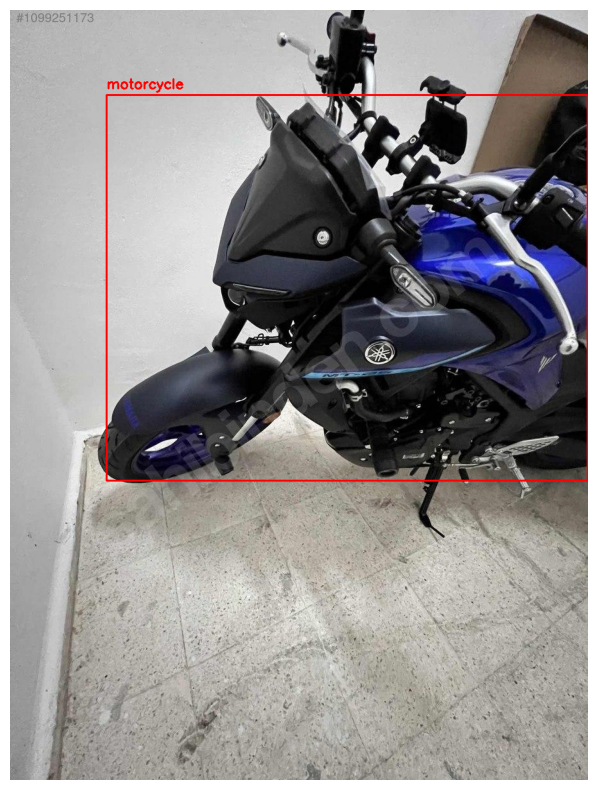

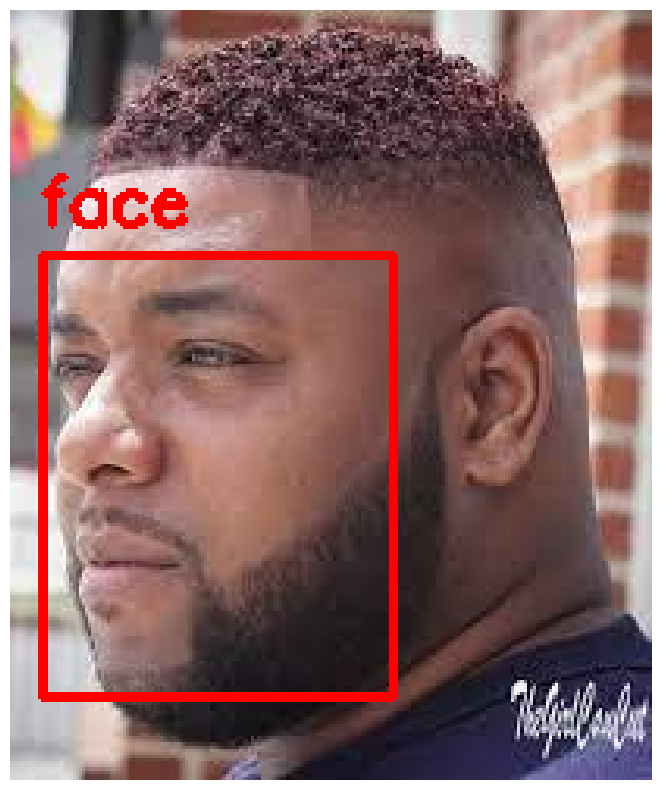

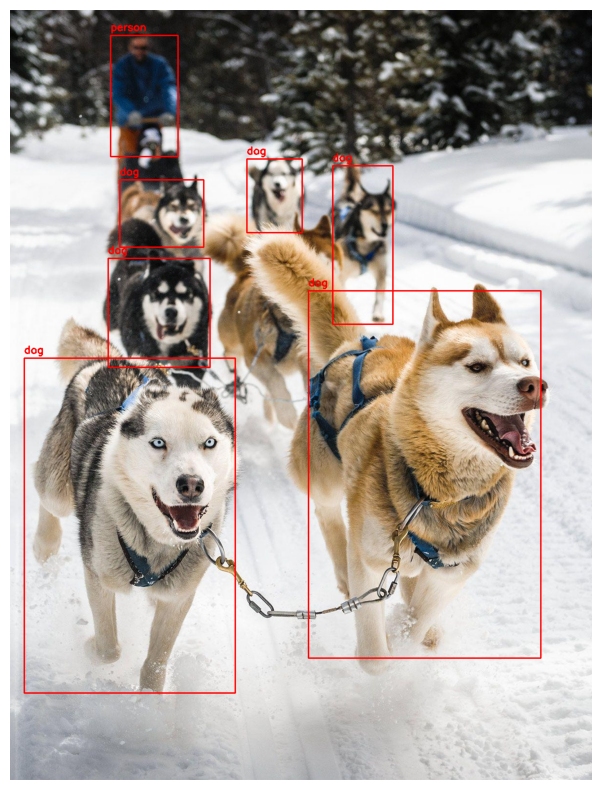

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths to images and labels (adjust if needed)
images_dir = '/content/dataset_folder/train/images'
labels_dir = '/content/dataset_folder/train/labels'

# Class names from your data.yaml
class_names = ['car', 'dog', 'face', 'motorcycle', 'person', 'plate']

def load_labels(label_path):
    boxes = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) == 5:
                cls_id, x_center, y_center, width, height = parts
                boxes.append({
                    'cls_id': int(cls_id),
                    'x_center': float(x_center),
                    'y_center': float(y_center),
                    'width': float(width),
                    'height': float(height)
                })
    return boxes

def plot_image_with_boxes(image_path, boxes):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    for box in boxes:
        cls_id = box['cls_id']
        # Convert normalized to pixel coordinates
        x_center = box['x_center'] * w
        y_center = box['y_center'] * h
        width = box['width'] * w
        height = box['height'] * h

        # Calculate box corners
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Draw rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

        # Put class name text
        cv2.putText(img, class_names[cls_id], (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Pick some random images from train folder to visualize
image_files = os.listdir(images_dir)
sample_images = random.sample(image_files, 3)  # visualize 3 random images

for img_file in sample_images:
    img_path = os.path.join(images_dir, img_file)
    label_file = img_file.replace('.jpg', '.txt').replace('.png', '.txt')
    label_path = os.path.join(labels_dir, label_file)

    if os.path.exists(label_path):
        boxes = load_labels(label_path)
        plot_image_with_boxes(img_path, boxes)
    else:
        print(f"Label file not found for image {img_file}")


In [ ]:
!python train.py --device cpu --batch-size 8 --img 416 --epochs 30 --data /content/dataset_folder/data.yaml --weights yolov5s.pt --freeze 10 --name cpu_run


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-30 22:18:11.100163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748643491.126722   39115 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748643491.134470   39115 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: WARNING Unable to verify login in offline mode.
train: weights=yolov5s.pt, cfg=, data=/content/dataset_folder/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, nop

In [ ]:
!cat ../dataset_folder/data.yaml


train: /content/dataset_folder/train/images
val: /content/dataset_folder/valid/images
test: /content/dataset_folder/test/images

nc: 6
names: ['car', 'dog', 'face', 'motorcycle', 'person', 'plate']

roboflow:
  workspace: arisckm
  project: object-detection-computer-vision-kkdzh
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/arisckm/object-detection-computer-vision-kkdzh/dataset/1

In [ ]:
yaml_path = "../dataset_folder/data.yaml"

with open(yaml_path, "r") as f:
    data = f.read()

# Fix relative paths to absolute ones
data = data.replace("../train/images", "/content/dataset_folder/train/images")
data = data.replace("../valid/images", "/content/dataset_folder/valid/images")
data = data.replace("../test/images", "/content/dataset_folder/test/images")

with open(yaml_path, "w") as f:
    f.write(data)


In [ ]:
from google.colab import files
files.download('runs/train/custom_detector2/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python detect.py --weights runs/train/custom_detector2/weights/best.pt --source dog.png --conf-thres 0.5


detect: weights=['runs/train/custom_detector2/weights/best.pt'], source=dog.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/dog.png: 448x640 (no detections), 478.4ms
Speed: 3.2ms pre-process, 478.4ms inference, 0.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


In [ ]:
!pwd


/content/yolov5
